# Domácí úkol:
## 1. Část:
Vytvořte funkci, která bude počítat odmocninu pomocí tzv. prosté iterační metody (metody kterou používali např. v Řecku - Archimedes). Funkce bude mít dva parametry: `a` (číslo jehož odmocninu chceme spočítat) a `n` (počet iterací metody). Funkce bude vracet aproximaci odmocniny čísla `a`.

Jednotlivé iterace metody jsou velmi jednoduché, ukážeme si i její odvození:
- začneme s tím co vlastně chceme zjistit, tedy najít takové $x$, že platí: $$x^2 = a$$
- přičteme k obou stranám rovnice $x^2$: $$2x^2= a + x^2$$
- podělíme $2x$: $$x = \frac{\frac{a}{x} + x}{2}$$
- pokud $x\neq 0$, pak se jedná stále o stejnou rovnici
- nyní přistoupíme k aproximaci. Předpokládáme, že máme aproximaxi ${x_i}$, pak její zpřesnění dostaneme vztahem: $$x_{i+1} = \frac{\frac{a}{x_i} + x_i}{2}$$

Pokud chceme celý proces zabalit do funkce, stačí nám nějaký počáteční odhad $x_0$  (například $x_0 = a$) a následně `n`-krát zopakovat výpočet $x_{i+1}$. 

Vyzkoušejte metodu na několika číslech, porovnejte s výsledky z funkce `sqrt()` z modulu `math`.

In [10]:
def archimedes_sqrt(a, n):
    """Computes an approximate square root of a using the Archimedean method."""
    if a < 0:
        return None
    x = a 

    for _ in range(n):
        x = (a / x + x) / 2

    return x

In [11]:
test_values = [4, 9, 16, 25, 100]
iterations = 5 

for a in test_values:
    approx_sqrt = archimedes_sqrt(a, iterations)
    print(f"√{a} ≈ {approx_sqrt}")

√4 ≈ 2.000000000000002
√9 ≈ 3.000000001396984
√16 ≈ 4.000000636692939
√25 ≈ 5.000023178253949
√100 ≈ 10.032578510960604


In [12]:
import math

test_values = [4, 9, 16, 25, 100]
iterations = 5  

print("Number | Archimedes' Method | math.sqrt()")
print("-----------------------------------------")

for a in test_values:
    approx_sqrt = archimedes_sqrt(a, iterations)
    true_sqrt = math.sqrt(a)
    print(f"{a:5} | {approx_sqrt:15.10f} | {true_sqrt:15.10f}")  

Number | Archimedes' Method | math.sqrt()
-----------------------------------------
    4 |    2.0000000000 |    2.0000000000
    9 |    3.0000000014 |    3.0000000000
   16 |    4.0000006367 |    4.0000000000
   25 |    5.0000231783 |    5.0000000000
  100 |   10.0325785110 |   10.0000000000


## 2. Část:
Aproximujte hodnotu $\pi$ pomocí pravidelných n-úhelníků. Tento postup používal např. Archimedes. 

Nejprve si ukážeme jakým způsobem lze pomocí pravidelných n-úhelníků aproximovat hodnotu $\pi$. Začneme s jednotkovým kruhem (poloměr je 1), do kterého vepíšeme pravidelný 6-ti úhelník. Je asi zřejmé, že obsah kruhu je $\pi$ a že je větší než obsah libovolného velkého pravidelného n-úhelníku. Pomocí 6-ti úhelníku odvodíme výpočet obsahu pravidelného 12-ti úhelníku. Viz. obrázek:  
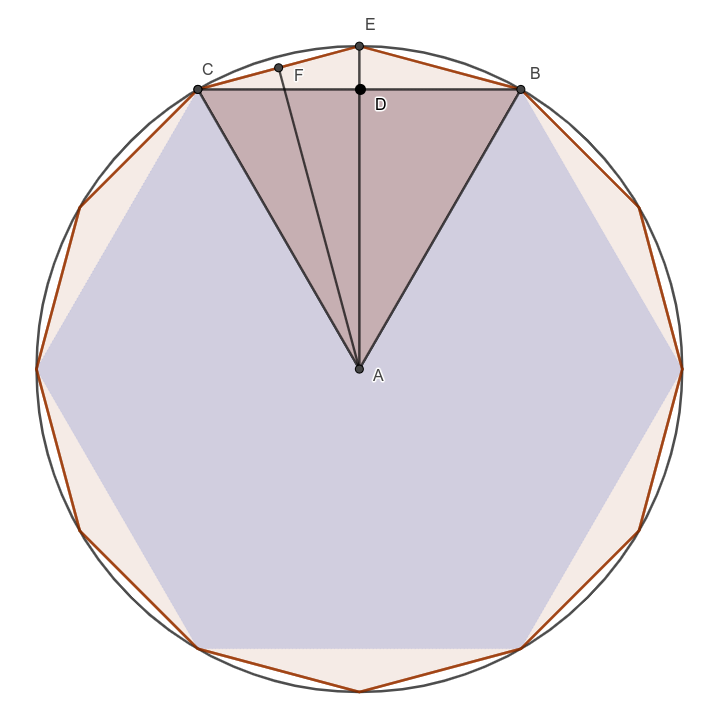

- pro pravidelný 6-ti úhelník platí |AB| = |BC| = |CA| = 1 (rovnoramenný trojúhelník)
- tedy jeho výška lze spočítat jako $v = \sqrt{|AB|^2 - (|BC|/2)^2}$
    - tedy obsah vepsaného pravidelného 6-ti úhelníku (a tedy i náš odhad $\pi$) je $S = 6\cdot|BC|\cdot v/2$
- pro pravidelný 12-ti úhelník platí |AC| = |AE| = 1 (rovnoramenný trojúhelník) a $$|CE| = \sqrt{(|BC|/2)^2 + (1-v)^2},$$ kde $v$ je výška vepsaného pravidelného 6-ti úhelníku
    - tedy obsah vepsaného pravidelného 12-ti úhelníku se dá spočítat opět pomocí výšky rovnoramenného trojúhelníku
- poslední krok lze opakovat iteračně pro libovolný n-úhelník a jeho následující 2n-úhelník
    - předpokládáme, že každý z $n$ trojuhelníků pravidelného n-úhelníku má dvě ramena o délce $a_n$, základnu o délce $b_n$ a výšku $v_n$
    - pak každý z $2n$ trojúhelníků pravidelného 2n-úhelníku má dvě ramena o délce $a_{2n}$, základnu o délce $$b_{2n}=\sqrt{(b_{n}/2)^2 + (1-v_{n})^2}$$ a výšku $$v_{2n} = \sqrt{a_{2n}^2 - (b_{2n}/2)^2}$$ 
    - poznamenejme, že $a_{n} = 1$ 

Úkol je tedy vytvořit funkci, která bude počítat obsah pravidelného $6\cdot 2^n$-úhelníku (odhad čísla $\pi$) pro libovolné $n$. Funkce bude mít jeden parametr `n` a bude vracet aproximaci $\pi$.

Použijte vaši implementaci funkce pro výpočet odmocniny se 100 iteracemi.

Vyzkoušejte různé hodnoty `n` a porovnejte s výsledky z funkce `pi` z modulu `math`. Kolika-úhelník je potřeba pro aproximaci $\pi$ s chybou menší než 0.000001=$10^{-6}$

In [ ]:
import math


def archimedes_pi(n):
    """Approximates π using an inscribed polygon with 6 * 2^n sides."""
    side_length = 1
    height = math.sqrt(1 - (side_length / 2) ** 2)
    area = 6 * (side_length * height) / 2

    for _ in range(n):
        new_side = math.sqrt((side_length / 2) ** 2 + (1 - height) ** 2)
        new_height = math.sqrt(1 - (new_side / 2) ** 2)
        area = 2 * area
        side_length = new_side
        height = new_height

    return area

In [ ]:

precision = 1e-6
n = 0

while True:
    approx_pi = archimedes_pi(n)
    error = abs(approx_pi - math.pi)

    print(f"Iteration {n}: π ≈ {approx_pi}, error = {error}")

    if error < precision:
        print(f"Required {6 * 2**n}-gon to reach precision {precision}.")
        break

    if n > 50:
        print("Too many iterations, something might be wrong.")
        break

    n += 1 


Iteration 0: π ≈ 2.598076211353316, error = 0.5435164422364771
Iteration 1: π ≈ 5.196152422706632, error = 2.054559769116839
Iteration 2: π ≈ 10.392304845413264, error = 7.250712191823471
Iteration 3: π ≈ 20.784609690826528, error = 17.643017037236735
Iteration 4: π ≈ 41.569219381653056, error = 38.42762672806326
Iteration 5: π ≈ 83.13843876330611, error = 79.99684610971632
Iteration 6: π ≈ 166.27687752661222, error = 163.13528487302244
Iteration 7: π ≈ 332.55375505322445, error = 329.41216239963467
Iteration 8: π ≈ 665.1075101064489, error = 661.9659174528591
Iteration 9: π ≈ 1330.2150202128978, error = 1327.073427559308
Iteration 10: π ≈ 2660.4300404257956, error = 2657.288447772206
Iteration 11: π ≈ 5320.860080851591, error = 5317.718488198001
Iteration 12: π ≈ 10641.720161703182, error = 10638.578569049592
Iteration 13: π ≈ 21283.440323406365, error = 21280.298730752776
Iteration 14: π ≈ 42566.88064681273, error = 42563.73905415914
Iteration 15: π ≈ 85133.76129362546, error = 85130

## 3. Část:
Postup aproximace $\pi$ pomocí pravidelných n-úhelníků je neuvěřitelně pracný. Tato metoda se však používala až do 17. století. Jeden z posledních používajících tuto metodu byl Christoph Grienberger, který touto metodou získal 38 desetinných míst $\pi$. Takovýto výpočet v té době trval desítky let.

Pak přišel Sir Isac Newton, který pomocí svých objevů na poli matematické analýzy (infinitezimální počet neboli kalkulus) navrhnul zcela nový postup (1666), který je nesrovnatelně rychlejší.

Jeho postup vychází z binomické věty, která říká: $$(1+x)^n = 1 + \frac{n}{1}x + \frac{n}{1}\frac{(n-1)}{2}x^2 + \frac{n}{1}\frac{(n-1)}{2}\frac{(n-2)}{3}x^3 + \dots$$
Pokud je $n$ přirozené číslo, pak dříve nebo později narazíme na $(n-n)$ v čitateli a pak všechny další členy budou 0.



Newton ukázal, že $n$ nemusí být kladné celé číslo, ale klidně zlomek. Pro $n = \frac{1}{2}$ dostaneme: 
$$(1+x)^{\frac{1}{2}} = 1 + \frac{\frac{1}{2}}{1}x + \frac{\frac{1}{2}}{1}\frac{(\frac{1}{2}-1)}{2}x^2 + \frac{\frac{1}{2}}{1}\frac{(\frac{1}{2}-1)}{2}\frac{(\frac{1}{2}-2)}{3}x^3 + \dots$$
Nyní však jsou všechny členy nenulové, což ale nevadí, neboť jsou stále menší a menší.



Newton věděl, že rovnice funkce tvořící horní polovinu jednotkového kruhu je: $$y = \sqrt{1-x^2}$$
Zároveň věděl (objevil), že plocha pod křivkou je integrál funkce tvořící křivku. 

Do vzorce pro $(1+x)^{\frac{1}{2}}$ vložíme $x = - x^2$  a dostaneme 
$$(1-x^2)^{\frac{1}{2}} = 1 + \frac{\frac{1}{2}}{1}(-x^2) + \frac{\frac{1}{2}}{1}\frac{(\frac{1}{2}-1)}{2}(-x^2)^2 + \frac{\frac{1}{2}}{1}\frac{(\frac{1}{2}-1)}{2}\frac{(\frac{1}{2}-2)}{3}(-x^2)^3 + \dots$$
Toto můžeme upravit (zbavíme se $\frac{1}{2}$ a jednotlivých `-`):

$$(1-x^2)^{\frac{1}{2}} = 1 - \frac{1}{2}x^2 - \frac{1}{2}\frac{1}{4}x^4 - \frac{1}{2}\frac{1}{4}\frac{3}{2\cdot 3}x^6 - \dots$$

Pokud bychom integrovali tuto funkci (respektivě její vyjádření pomocí řady) stačí nám vědět jaký je integrál $x^n$, což Newton věděl. Integrál $x^n$ je $x^{n+1}/(n+1)$. Tedy při integraci dostaneme $$\intop(1-x^2)^{\frac{1}{2}} dx = \intop 1 dx - \frac{1}{2}\intop x^2 dx - \frac{1}{2}\frac{1}{4} \intop x^4 dx - \frac{1}{2}\frac{1}{4}\frac{3}{2\cdot 3} \intop x^6 dx - \dots$$

který vyjde $$\intop(1-x^2)^{\frac{1}{2}} dx = x - \frac{1}{2}\frac{1}{3}x^3 - \frac{1}{2}\frac{1}{4}\frac{1}{5}x^5 - \frac{1}{2}\frac{1}{4}\frac{3}{2\cdot 3}\frac{1}{7}x^7 - \dots$$



Pokud si všimneme, že jednotlivé členy v řadě mají stále vyšší mocninu $x$, tak víme, že čím menší $x$ zvolíme (mezi 0 a 1), tím rychleji řada z konverguje. Proto budeme $\pi$ počítat pomocí části kruhu zobrazené na obrázku níže.

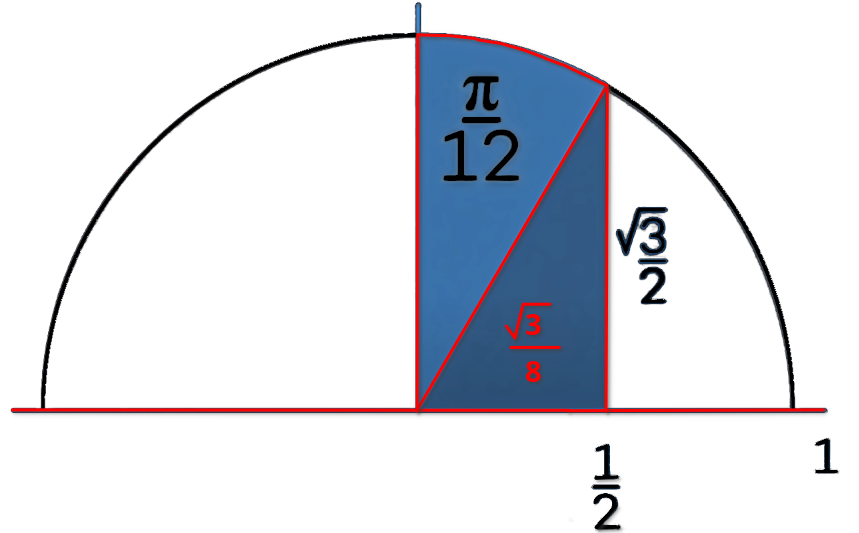

Integrál z funkce $f(x) = \sqrt{1-x^2}$ od 0 do $\frac{1}{2}$ je složen z $\frac{1}{12}$ obsahu kruhu a pravoúhlého trojúhelníku s odvěsnami $1$ a $\frac{1}{2}$, tedy trojuhelníku o obsahu $\frac{\sqrt{3}}{8}$.


Tedy $$\intop_{0}^{\frac{1}{2}}(1-x^2)^{\frac{1}{2}} dx = \frac{\pi}{12} + \frac{\sqrt{3}}{8}$$ a zároveň víme, že $$\intop_{0}^{\frac{1}{2}}(1-x^2)^{\frac{1}{2}} dx = \left[  x - \frac{1}{2}\frac{1}{3}x^3 - \frac{1}{2}\frac{1}{4}\frac{1}{5}x^5 - \frac{1}{2}\frac{1}{4}\frac{3}{2\cdot 3}\frac{1}{7}x^7 - \dots \right]_0^{\frac{1}{2}}$$


Dosazením dolní meze dostaneme 0, neboť všechny členy řady obsahují $x$. Řada se tedy změní na:
$$\intop_{0}^{\frac{1}{2}}(1-x^2)^{\frac{1}{2}} dx = \frac{1}{2} - \frac{1}{2}\frac{1}{3}\frac{1}{2^3} - \frac{1}{2}\frac{1}{4}\frac{1}{5}\frac{1}{2^5} - \frac{1}{2}\frac{1}{4}\frac{3}{2\cdot 3}\frac{1}{7}\frac{1}{2^7} - \dots $$



Nyní už můžeme spočítat hodnotu $\pi$. Pro jednodušší implementaci se ještě podíváme na členy řady, konkrétně na vztah, jakým se postupně mění. Všimněme se také, že kromě prvního členu jsou všechny záporné ($\frac{1}{2}-n<0$), tedy budeme vždy počítat tzv. horní odhad.
$$\intop_{0}^{\frac{1}{2}}(1-x^2)^{\frac{1}{2}} dx = \frac{1}{2} - \frac{1}{3}\left(\frac{1}{2}\frac{1}{2^3}\right) - \frac{1}{5}\left(\frac{1}{2}\frac{1}{2^3}\right)\left(\frac{1}{4}\frac{1}{2^2}\right) - \frac{1}{7}\left(\frac{1}{2}\frac{1}{2^3}\right)\left(\frac{1}{4}\frac{1}{2^2}\right)\left(\frac{3}{2\cdot 3}\frac{1}{2^2}\right) - \dots$$
$$\intop_{0}^{\frac{1}{2}}(1-x^2)^{\frac{1}{2}} dx = \frac{1}{2} - \left[ \frac{1}{3}a_1 + \frac{1}{5}a_2 + \frac{1}{7}a_3 + \dots \right]$$
$$a_{1} = \frac{1}{2}\frac{1}{2^3},~~~~~a_{i} = a_{i-1}\frac{2i-3}{2i}\frac{1}{2^2}$$




Tedy celková hodnota $\pi$ lze aproximovat pomocí $n$ členů řady:
$$\pi \approx 12 \cdot \left[ - \frac{\sqrt{3}}{8} + \frac{1}{2} - \sum_{i=1}^{n}\frac{1}{2i+1}a_i \right] $$

**Konečně k vašemu úkolu:** Vytvořte funkci aproximující $\pi$ pomocí $n$ členů řady. Funkce bude mít jeden parametr $n$ a vracet aproximaci $\pi$. Pro spočtení $\sqrt{3}$ použijte metodu z úkolu 1. s parametrem $n=1000$.

Vyzkoušejte různé hodnoty `n` a porovnejte s výsledky z funkce `pi` z modulu `math`. Kolik členů je potřeba pro aproximaci $\pi$ s chybou menší než 0.000001=$10^{-6}$. 

In [ ]:
import math

def newton_series_pi(n):
    """Approximates π using Newton's binomial series expansion."""

    sqrt_3_over_8 = math.sqrt(3) / 8 
    sum_series = 0 

    a_i = 1 / (2 ** 3)

    for i in range(1, n + 1):
        sum_series += (1 / (2 * i + 1)) * a_i 
        a_i *= (2 * i - 3) / (2 * i * 2 ** 2)

    approx_pi = 12 * (sqrt_3_over_8 + 0.5 * sum_series)
    return approx_pi

In [ ]:
import math
precision = 1e-6
n = 1 

print("Testing Newton Series Approximation for π:")

while True:
    approx_pi = newton_series_pi(n)
    error = abs(approx_pi - math.pi)

    print(f"Iteration {n}: π ≈ {approx_pi}, error = {error}")

    if error < precision:
        print(f"Newton Series reached precision {precision} with {n} terms.")
        break 

    if n > 10000:
        print("Too many iterations, something might be wrong.")
        break

    n += 1 

Testing Newton Series Approximation for π:
Iteration 1: π ≈ 2.848076211353316, error = 0.2935164422364771
Iteration 2: π ≈ 2.8293262113533157, error = 0.31226644223647737
Iteration 3: π ≈ 2.8284891577818874, error = 0.31310349580790575
Iteration 4: π ≈ 2.828407777573554, error = 0.31318487601623923
Iteration 5: π ≈ 2.8283973738537385, error = 0.31319527973605465
Iteration 6: π ≈ 2.8283958333029195, error = 0.31319682028687357
Iteration 7: π ≈ 2.8283955829634118, error = 0.31319707062638136
Iteration 8: π ≈ 2.8283955395747364, error = 0.3131971140150567
Iteration 9: π ≈ 2.8283955316891305, error = 0.3131971219006626
Iteration 10: π ≈ 2.828395530202756, error = 0.3131971233870372
Iteration 11: π ≈ 2.828395529914367, error = 0.31319712367542607
Iteration 12: π ≈ 2.828395529857082, error = 0.3131971237327109
Iteration 13: π ≈ 2.82839552984548, error = 0.3131971237443132
Iteration 14: π ≈ 2.8283955298430907, error = 0.3131971237467024
Iteration 15: π ≈ 2.828395529842592, error = 0.313197123

## Bonusový úkol:
Zhodnoťe náročnost obou metod, je `n` členů řady stejně náročné jako výpočet pomocí $6\cdot 2^n$-úhelníku? Kolikrát musíme počítat odmocninu v každé z metod?

Pokud chcete vyzkoušet kolik skutečně umíte spočíst desetinných míst (za běžnou přesnost floating precision) můžete využít knihovnu `decimal` a funkci `getcontext().prec = 1000` pro nastavení počtu desetinných míst.

In [ ]:
# ukázka decimal a číslo pi na 1000 míst
from decimal import getcontext, Decimal as D
import math
getcontext().prec = 100 # počítáme s 100 desetinnými místy
pi_1000d = D("3.141592653589793238462643383279\
5028841971693993\
7510582097494459230781640628620899862803482534\
2117067982148086513282306647093844609550582231\
7253594081284811174502841027019385211055596446\
2294895493038196442881097566593344612847564823\
3786783165271201909145648566923460348610454326\
6482133936072602491412737245870066063155881748\
8152092096282925409171536436789259036001133053\
0548820466521384146951941511609433057270365759\
5919530921861173819326117931051185480744623799\
6274956735188575272489122793818301194912983367\
3362440656643086021394946395224737190702179860\
9437027705392171762931767523846748184676694051\
3200056812714526356082778577134275778960917363\
7178721468440901224953430146549585371050792279\
6892589235420199561121290219608640344181598136\
2977477130996051870721134999999837297804995105\
9731732816096318595024459455346908302642522308\
2533446850352619311881710100031378387528865875\
3320838142061717766914730359825349042875546873\
1159562863882353787593751957781857780532171226\
806613001927876611195909216420199")
pi_math = D(math.pi)

# počet platných cifer pi z knihovny math
print(math.floor(- math.log10(pi_1000d - pi_math))) # desítkový logaritmus z rozdílu

In [13]:
from decimal import Decimal, getcontext

getcontext().prec = 1000

pi_loaded = Decimal("3." +
                    "14159265358979323846264338327950288419716939937510" +
                    "58209749445923078164062862089986280348253421170679" +
                    "82148086513282306647093844609550582231725359408128" +
                    "48111745028410270193852110555964462294895493038196" +
                    "44288109756659334461284756482337867831652712019091" +
                    "45648566923460348610454326648213393607260249141273" +
                    "72458700660631558817488152092096282925409171536436" +
                    "78925903600113305305488204665213841469519415116094" +
                    "33057270365759591953092186117381932611793105118548")

pi_math = Decimal(math.pi)

correct_digits = -math.floor(math.log10(abs(pi_loaded - pi_math)))

archimedes_n = 0 
newton_n = 1 

precision = 1e-6

while True:
    approx_pi_archimedes = newton_series_pi(archimedes_n)
    error_archimedes = abs(approx_pi_archimedes - math.pi)

    if error_archimedes < precision:
        break

    archimedes_n += 1

while True:
    approx_pi_newton = newton_series_pi(newton_n)
    error_newton = abs(approx_pi_newton - math.pi)

    if error_newton < precision:
        break

    newton_n += 1

results = {
    "Correct digits of math.pi": correct_digits,
    "Iterations required (Archimedes)": archimedes_n,
    "Iterations required (Newton Series)": newton_n
}

results

NameError: name 'newton_series_pi' is not defined